In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import FeatureImportances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('cleaned_diabetes_df.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          520 non-null    int64  
 1   Age                 520 non-null    float64
 2   Gender              520 non-null    int64  
 3   Polyuria            520 non-null    int64  
 4   Polydipsia          520 non-null    int64  
 5   sudden weight loss  520 non-null    int64  
 6   weakness            520 non-null    int64  
 7   Polyphagia          520 non-null    int64  
 8   Genital thrush      520 non-null    int64  
 9   visual blurring     520 non-null    int64  
 10  Itching             520 non-null    int64  
 11  Irritability        520 non-null    int64  
 12  delayed healing     520 non-null    int64  
 13  partial paresis     520 non-null    int64  
 14  muscle stiffness    520 non-null    int64  
 15  Alopecia            520 non-null    int64  
 16  Obesity 

In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.432432,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.567568,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0.216216,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
df.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


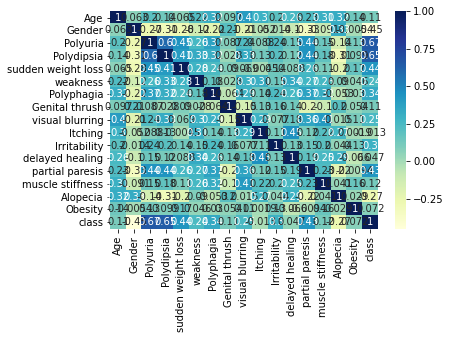

In [8]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu").figsize=(20,20)

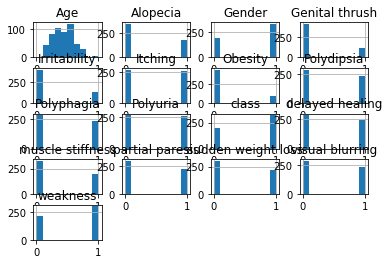

In [9]:
df.hist();

In [10]:
df["class"].value_counts(normalize=True)

1    0.615385
0    0.384615
Name: class, dtype: float64

In [61]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [62]:
kmeans.cluster_centers_

array([[0.40034999, 0.82374101, 0.17985612, 0.08273381, 0.14388489,
        0.38129496, 0.25179856, 0.20863309, 0.29136691, 0.4352518 ,
        0.13669065, 0.36690647, 0.18705036, 0.27697842, 0.5       ,
        0.14028777, 0.29136691],
       [0.47012508, 0.40909091, 0.85950413, 0.8677686 , 0.73140496,
        0.82231405, 0.69008264, 0.23966942, 0.62809917, 0.54545455,
        0.36363636, 0.5661157 , 0.7107438 , 0.48760331, 0.16528926,
        0.20247934, 0.98760331]])

In [64]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [65]:
kmeans.fit_predict(df)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

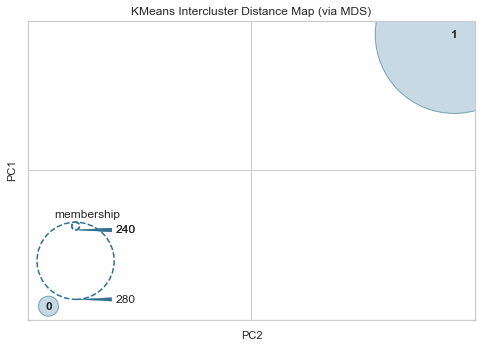

In [70]:
visualizer = InterclusterDistance(kmeans)
visualizer.fit(df)
visualizer.show()

In [71]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [74]:
f1_score(df['class'], kmeans.fit_predict(df))

0.8586572438162545

### Modeling Prep

In [11]:
df.drop("class", axis=1)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,0.432432,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,0.567568,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0.216216,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [12]:
y = df["class"]
X = df.drop("class", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=3)

In [14]:
df["class"].value_counts(normalize=True)

1    0.615385
0    0.384615
Name: class, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

1    0.634615
0    0.365385
Name: class, dtype: float64

In [16]:
y_train.value_counts(normalize=True)

1    0.610577
0    0.389423
Name: class, dtype: float64

In [90]:
len(df["class"])

520

In [95]:
all_ones = [1] * 520
all_zeros = [0] * 520

In [97]:
print(len(all_ones))
len(all_zeros)

520


520

In [94]:
f1_score(all_ones, df["class"])

0.761904761904762

In [98]:
f1_score(all_zeros, df["class"])

0.0

In [169]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_test, y_test)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5961538461538461

In [170]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_test, y_test)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5096153846153846

### Modeling

#### Decision Tree

In [19]:
# call the model
# fit the model using gridsearch
# make predictions
# evaluate

In [139]:
tree = DecisionTreeClassifier(random_state=11)
tree_params = {"criterion" : ["gini", "entropy"],
              "min_samples_split" : [2,4, 6, 8, 10],
              "min_samples_leaf" : [3, 4, 5, 6],
              "max_depth" : [2, 4, 6, 8, 10, 20]}


In [140]:
scorer_tree = make_scorer(f1_score)

In [141]:
all_accuracies_tree = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)

In [142]:
all_accuracies_tree

array([0.97619048, 0.92857143, 0.97619048, 0.92857143, 0.97619048,
       0.97619048, 0.95121951, 0.97560976, 0.90243902, 0.97560976])

In [143]:
all_accuracies_tree.mean()

0.956678281068525

In [144]:
all_accuracies_tree.std()

0.02606029540252981

In [145]:
grid_obj_tree = GridSearchCV(estimator=tree,
                     param_grid=tree_params,
                     scoring=scorer_tree,
                     cv=10,
                    )

In [146]:
grid_fit_tree = grid_obj_tree.fit(X_train, y_train)

In [147]:
grid_fit_tree

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring=make_scorer(f1_score))

In [148]:
best_clf_tree = grid_fit_tree.best_estimator_
best_parameters_tree = grid_fit_tree.best_params_

In [149]:
print(best_parameters_tree)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [150]:
best_clf_tree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=11)

In [151]:
best_result_tree = grid_fit_tree.best_score_
print(best_result_tree)

0.9412969483240854


In [152]:
best_clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=11)

In [153]:
best_train_predictions_tree = best_clf_tree.predict(X_train)

In [154]:
print('The training F1 Score is', f1_score(best_train_predictions_tree, y_train))

The training F1 Score is 0.9596774193548386


In [155]:
best_test_predictions_tree = best_clf_tree.predict(X_test)

In [156]:
print('The testing F1 Score is', f1_score(best_test_predictions_tree, y_test))

The testing F1 Score is 0.9354838709677419


In [157]:
best_clf_tree.feature_importances_

array([0.09094489, 0.08918571, 0.51353146, 0.13052023, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00984843,
       0.029216  , 0.03344333, 0.00343855, 0.01641405, 0.06454835,
       0.01890899])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


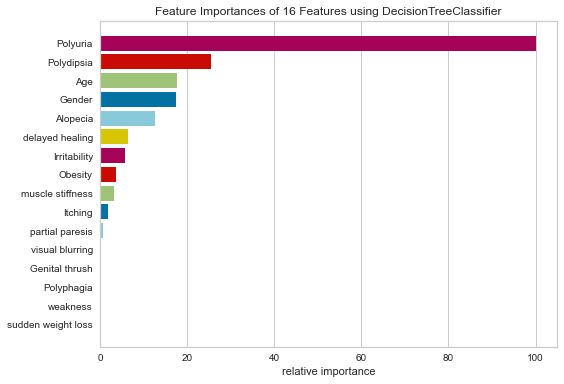

In [161]:
viz = FeatureImportances(best_clf_tree)
viz.fit(X_test, y_test)
viz.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


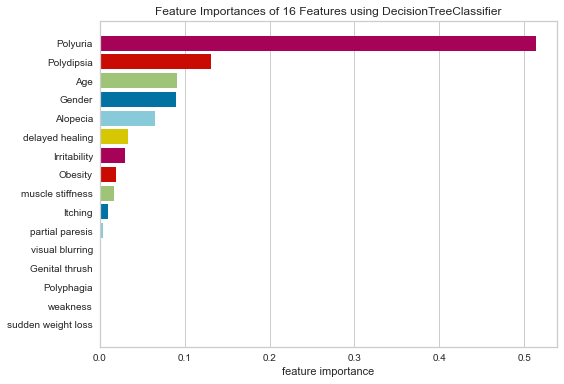

In [166]:
viz = FeatureImportances(best_clf_tree, relative=False)
viz.fit(X_test, y_test)
viz.show()

#### KNN

In [39]:
knn_clf = KNeighborsClassifier()
    
knn_params = {"n_neighbors" : [1, 2, 3, 4, 5, 6, 7, 8],
               "weights": ["uniform", "distance"],
              }

scorer = make_scorer(f1_score)
all_accuracies = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, cv=10)

grid_obj = GridSearchCV(estimator=knn_clf,
                     param_grid=knn_params,
                     scoring=scorer,
                     cv=10,
                    )

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
best_parameters = grid_fit.best_params_
best_result = grid_fit.best_score_

best_clf.fit(X_train, y_train)
best_train_predictions = best_clf.predict(X_train)

print('The training F1 Score is', f1_score(best_train_predictions, y_train))

The training F1 Score is 1.0


In [40]:
# all_accuracies
# print(all_accuracies.mean())
# print(all_accuracies.std())
# print(grid_fit)
# print(best_parameters)
# print(best_clf)
print(best_result)

0.9752196214001149


In [41]:
best_test_predictions = best_clf.predict(X_test)
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

The testing F1 Score is 0.9923664122137404


#### Logistic Regression

In [43]:
log_clf = LogisticRegression(random_state=32, solver='liblinear')

scorer = make_scorer(f1_score)
all_accuracies = cross_val_score(estimator=log_clf, X=X_train, y=y_train, cv=10)

log_clf.fit(X_train, y_train)

log_clf_preds = log_clf.predict(X_train)

print('The training F1 Score is', f1_score(log_clf_preds, y_train))

The training F1 Score is 0.9404761904761905


In [44]:
log_clf_test = log_clf.predict(X_test)
print('The testing F1 Score is', f1_score(log_clf_test, y_test))

The testing F1 Score is 0.955223880597015


In [114]:
log_clf_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [110]:
log_clf.predict_proba(X_test)

array([[1.51004893e-02, 9.84899511e-01],
       [1.33431434e-01, 8.66568566e-01],
       [9.29977417e-01, 7.00225825e-02],
       [8.15541937e-01, 1.84458063e-01],
       [5.86958191e-04, 9.99413042e-01],
       [3.40544325e-04, 9.99659456e-01],
       [3.64704765e-02, 9.63529524e-01],
       [2.44270759e-01, 7.55729241e-01],
       [1.63797082e-01, 8.36202918e-01],
       [9.35815543e-01, 6.41844575e-02],
       [8.23749804e-03, 9.91762502e-01],
       [2.29417391e-02, 9.77058261e-01],
       [4.09563013e-03, 9.95904370e-01],
       [9.89547424e-01, 1.04525758e-02],
       [1.28321288e-02, 9.87167871e-01],
       [9.84795286e-01, 1.52047141e-02],
       [4.58937156e-01, 5.41062844e-01],
       [2.40962113e-03, 9.97590379e-01],
       [6.77799217e-01, 3.22200783e-01],
       [2.24840091e-01, 7.75159909e-01],
       [3.40544325e-04, 9.99659456e-01],
       [2.58179547e-01, 7.41820453e-01],
       [2.48750271e-02, 9.75124973e-01],
       [1.27965002e-01, 8.72034998e-01],
       [8.976999

In [116]:
#mean accuracy
log_clf.score(X_test, y_test, sample_weight=None)

0.9423076923076923

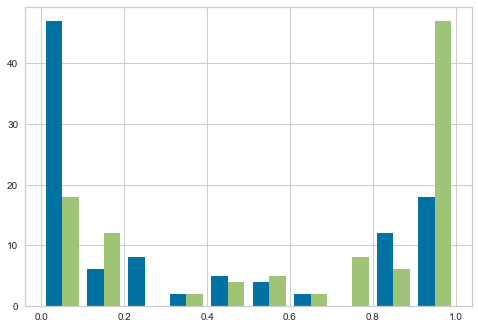

In [109]:
plt.hist(log_probs_test, bins = 10)
plt.show()


#### SVM

In [52]:
svc_clf = SVC(random_state=42, gamma='scale')
    
svc_params = {"C": [0.1, 0.5, 1, 3, 5],
              "kernel": ['linear','rbf'],
              "probability": [True, False]
             }

scorer = make_scorer(f1_score)
all_accuracies = cross_val_score(estimator=svc_clf, X=X_train, y=y_train, cv=10)

grid_obj = GridSearchCV(estimator=svc_clf,
                     param_grid=svc_params,
                     scoring=scorer,
                     cv=10,
                    )

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
best_result = grid_fit.best_score_
best_parameters = grid_fit.best_params_

best_clf.fit(X_train, y_train)
best_train_predictions = best_clf.predict(X_train)

print('The training F1 Score is', f1_score(best_train_predictions, y_train))

The training F1 Score is 0.996078431372549


In [53]:
best_test_predictions = best_clf.predict(X_test)
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

The testing F1 Score is 0.9850746268656716


In [54]:
print(confusion_matrix(y_test, best_test_predictions))
print(classification_report(y_test, best_test_predictions))

[[36  2]
 [ 0 66]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        66

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



Confusion matrix, without normalization
[[36  2]
 [ 0 66]]
Normalized confusion matrix
[[0.94736842 0.05263158]
 [0.         1.        ]]


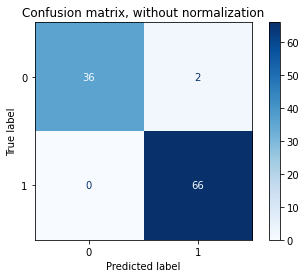

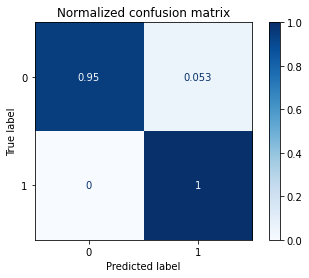

In [59]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### NB

In [85]:
nb_clf = MultinomialNB()

In [87]:
scorer = make_scorer(f1_score)
all_accuracies = cross_val_score(estimator=nb_clf, X=X_train, y=y_train, cv=10)

nb_clf.fit(X_train, y_train)

nb_clf_preds = nb_clf.predict(X_train)

print('The training F1 Score is', f1_score(nb_clf_preds, y_train))

The training F1 Score is 0.9213051823416506


In [88]:
nb_clf_test = nb_clf.predict(X_test)
print('The testing F1 Score is', f1_score(nb_clf_test, y_test))

The testing F1 Score is 0.9420289855072465


Confusion matrix, without normalization
[[31  7]
 [ 1 65]]
Normalized confusion matrix
[[0.81578947 0.18421053]
 [0.01515152 0.98484848]]


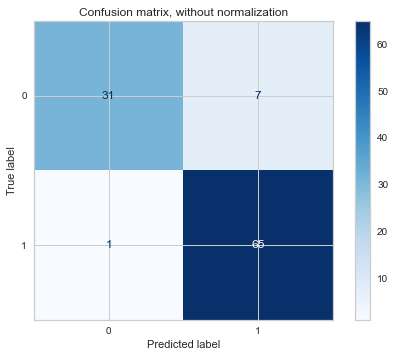

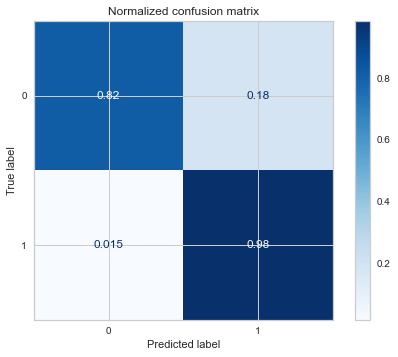

In [89]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()